In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
import numpy as np
import tensorflow_hub as hub



In [ ]:
dataset,metadata=tfds.load('cifar10',as_supervised=True,with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteL5ZSLE/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteL5ZSLE/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
train_ds=dataset['train']
test_ds=dataset['test']



In [ ]:
def rescale(images,lables):
    images=tf.cast(images,tf.float32)
    images /=255
    return images,lables


In [ ]:
train_ds=train_ds.map(rescale)
test_ds=test_ds.map(rescale)

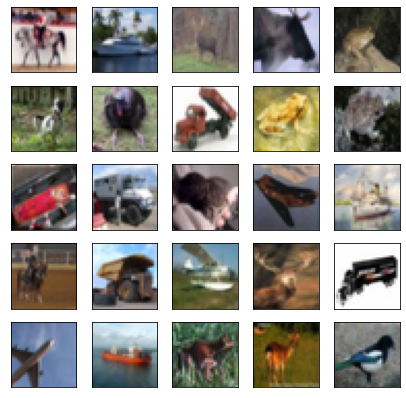

In [ ]:
plt.figure(figsize=(7,7))
i=1
for (image,lable) in train_ds.take(25):
    plt.subplot(5,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    i+=1


In [ ]:
batch_size=64
train_ds=train_ds.cache().repeat().shuffle(60000).batch(batch_size)
test_ds=test_ds.cache().batch(batch_size)

In [ ]:
model=tf.keras.Sequential(
    [
       tf.keras.layers.Conv2D(32,(3,3), padding='same', activation='relu',input_shape=(32,32,3)),
       tf.keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'),
       tf.keras.layers.MaxPooling2D((2,2),strides=2),
       tf.keras.layers.Dropout(.2),

       tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu'),
       tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu'),
       tf.keras.layers.MaxPooling2D((2,2),strides=2),
       tf.keras.layers.Dropout(.2),

       tf.keras.layers.Conv2D(128,(3,3), padding='same', activation='relu'),
       tf.keras.layers.Conv2D(128,(3,3), padding='same', activation='relu'),
       tf.keras.layers.MaxPooling2D((2,2),strides=2),
       tf.keras.layers.Dropout(.2),

       tf.keras.layers.Conv2D(256,(3,3), padding='same', activation='relu'),
       tf.keras.layers.MaxPooling2D((2,2),strides=2),
       tf.keras.layers.Dropout(.4),



       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(256,activation='relu'),
       tf.keras.layers.Dropout(.3),
       tf.keras.layers.Dense(128,activation='relu'),
       tf.keras.layers.Dropout(.4),
       tf.keras.layers.Dense(10)
    ]
)

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)        

In [ ]:
hist=model.fit(train_ds, epochs=25, steps_per_epoch=60000//batch_size)

Epoch 1/25
937/937 [==============================] - 40s 23ms/step - loss: 1.8454 - accuracy: 0.3030
Epoch 2/25
937/937 [==============================] - 21s 23ms/step - loss: 1.3431 - accuracy: 0.5112
Epoch 3/25
937/937 [==============================] - 22s 23ms/step - loss: 1.1551 - accuracy: 0.5901
Epoch 4/25
937/937 [==============================] - 21s 23ms/step - loss: 1.0447 - accuracy: 0.6328
Epoch 5/25
937/937 [==============================] - 22s 23ms/step - loss: 0.9580 - accuracy: 0.6685
Epoch 6/25
937/937 [==============================] - 21s 23ms/step - loss: 0.9010 - accuracy: 0.6877
Epoch 7/25
937/937 [==============================] - 22s 23ms/step - loss: 0.8572 - accuracy: 0.7050
Epoch 8/25
937/937 [==============================] - 21s 23ms/step - loss: 0.8321 - accuracy: 0.7178
Epoch 9/25
937/937 [==============================] - 21s 23ms/step - loss: 0.7825 - accuracy: 0.7322
Epoch 10/25
937/937 [==============================] - 21s 23ms/step - loss: 0.763

In [ ]:
loss,acc=model.evaluate(test_ds,steps=10000//batch_size)

156/156 [==============================] - 5s 27ms/step - loss: 0.6363 - accuracy: 0.7849


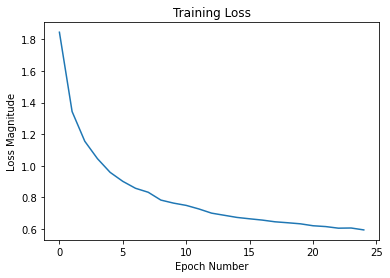

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.title('Training Loss')
plt.plot(hist.history['loss']);

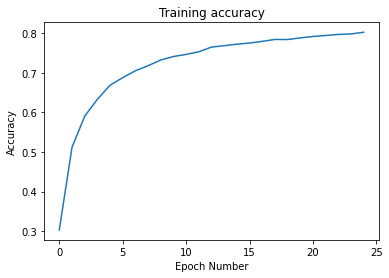

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.title('Training accuracy')
plt.plot(hist.history['accuracy']);

In [ ]:
URL = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2"
feature_extractor =hub.KerasLayer(URL, input_shape=(32, 32,3))
feature_extractor.trainable = True

In [ ]:
model=tf.keras.Sequential(
    [
      feature_extractor,
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              20331360  
_________________________________________________________________
dense_5 (Dense)              (None, 128)               163968    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 20,496,618
Trainable params: 20,342,746
Non-trainable params: 153,872
_________________________________________________________________


In [ ]:
batch_size=256
his=model.fit(train_ds, epochs=15, steps_per_epoch=60000//batch_size)

Epoch 1/15
234/234 [==============================] - 44s 189ms/step - loss: 0.3111 - accuracy: 0.8986
Epoch 2/15
234/234 [==============================] - 44s 189ms/step - loss: 0.3087 - accuracy: 0.8980
Epoch 3/15
234/234 [==============================] - 44s 189ms/step - loss: 0.2741 - accuracy: 0.9133
Epoch 4/15
234/234 [==============================] - 44s 189ms/step - loss: 0.2720 - accuracy: 0.9111
Epoch 5/15
234/234 [==============================] - 44s 189ms/step - loss: 0.2578 - accuracy: 0.9191
Epoch 6/15
234/234 [==============================] - 44s 189ms/step - loss: 0.2524 - accuracy: 0.9185
Epoch 7/15
234/234 [==============================] - 44s 189ms/step - loss: 0.2204 - accuracy: 0.9294
Epoch 8/15
234/234 [==============================] - 44s 189ms/step - loss: 0.2023 - accuracy: 0.9325
Epoch 9/15
234/234 [==============================] - 44s 189ms/step - loss: 0.1868 - accuracy: 0.9398
Epoch 10/15
234/234 [==============================] - 44s 189ms/step - l

In [ ]:
loss,acc=model.evaluate(test_ds,steps=10000//batch_size)

39/39 [==============================] - 3s 81ms/step - loss: 0.4927 - accuracy: 0.8618


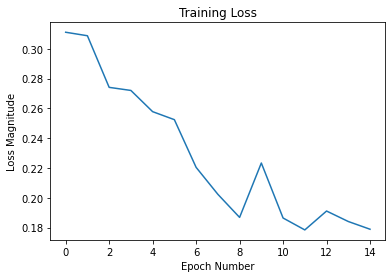

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.title('Training Loss')
plt.plot(his.history['loss']);

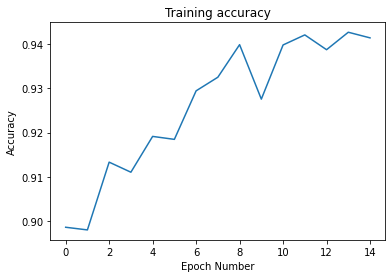

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.title('Training accuracy')
plt.plot(his.history['accuracy']);

In [ ]:
model.save('model/cifar10.h5')